In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install ipython-autotime
%load_ext autotime

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 20.9 MB/s eta 0:00:00
time: 411 µs (started: 2023-04-21 20:33:40 +00:00)


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import copy
np.set_printoptions(threshold=np.inf)

time: 358 ms (started: 2023-04-21 20:33:40 +00:00)


In [4]:
sample = pd.read_csv('/content/drive/MyDrive/Shape Detection MEC/NEW DATASET/FullData_train.csv')

testData =pd.read_csv('/content/drive/MyDrive/Shape Detection MEC/NEW DATASET/FullData_test.csv')

time: 5.65 s (started: 2023-04-21 20:34:04 +00:00)


In [5]:
X_train= sample.drop('Object_Held', axis=1)
y_train= sample[['Object_Held']]
X_test= testData.drop('Object_Held', axis=1)
y_test= testData[['Object_Held']]

time: 59.4 ms (started: 2023-04-21 20:34:14 +00:00)


In [6]:
X_train.columns = sample.columns[:-1]
cols=sample.columns[:-1]

time: 866 µs (started: 2023-04-21 20:34:14 +00:00)


In [7]:
X_train

,J0_position,J0_Force,J1_position,J1_Force,J2_position,J2_Force,J3_position,J3_Force,J4_position,J4_Force,...,J11_position,J11_Force,J12_position,J12_Force,J13_position,J13_Force,J14_position,J14_Force,J15_position,J15_Force
0,0.008119,12.215250,0.685134,12.132826,0.399595,11.690787,-0.108055,11.456375,0.004573,9.744978,...,0.101528,14.144302,1.549638,17.789020,0.005061,17.673859,0.523644,17.591778,-0.177264,17.327213
1,-0.003441,10.100547,0.707132,9.995182,0.525035,9.420037,0.058627,9.106321,-0.003221,10.108407,...,0.043017,9.142822,1.620000,9.950350,0.006364,9.794267,0.347111,9.688614,-0.021198,9.351221
2,0.034834,53.954622,0.453638,54.049949,0.302375,54.594303,-0.012768,54.638252,0.031633,79.721974,...,0.503113,104.687077,1.537551,209.080077,0.182721,209.039294,-0.088818,208.927240,0.102254,120.585436
3,0.013676,9.686815,0.489211,9.585401,0.281235,9.035567,0.191362,8.723653,0.012528,10.076405,...,0.206281,38.431731,1.343416,41.547459,0.037806,41.492559,0.249490,41.425107,-0.017478,41.173379
4,0.009417,27.919452,0.663884,27.881558,0.501435,28.078398,0.100800,28.891416,0.007923,23.073542,...,0.302254,26.100076,1.551556,73.940438,0.084212,73.926919,0.034010,73.778666,0.029069,67.754853
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166395,-0.079587,55.335303,0.987947,55.276923,0.582942,55.578425,0.517543,55.767687,-0.031471,63.636456,...,0.866264,215.875732,1.490645,176.724715,-0.007883,176.700098,-0.291386,177.976748,0.617801,41.246161
166396,0.012335,102.394075,0.542167,102.361137,0.385693,102.181833,-0.309147,102.748423,0.015769,57.870940,...,0.409077,116.184315,1.541436,278.080360,0.239751,278.142236,-0.120679,278.143367,0.117454,278.099613
166397,0.009182,84.914467,1.178608,84.897049,-0.036520,84.802915,0.308205,28.489677,0.036798,103.330916,...,0.337277,63.017052,1.537739,255.371393,0.216287,255.389095,-0.417839,255.470303,0.340410,255.826867
166398,-0.084447,63.961332,0.927410,63.542579,0.604139,61.413639,0.555515,60.876348,-0.035314,50.402961,...,1.037511,166.017890,1.517674,224.146481,0.204189,224.658772,-0.303777,224.870441,0.621432,123.882373


time: 75.3 ms (started: 2023-04-21 20:34:14 +00:00)


In [8]:
X_train.describe()

,J0_position,J0_Force,J1_position,J1_Force,J2_position,J2_Force,J3_position,J3_Force,J4_position,J4_Force,...,J11_position,J11_Force,J12_position,J12_Force,J13_position,J13_Force,J14_position,J14_Force,J15_position,J15_Force
count,166400.000000,166400.000000,166400.000000,166400.000000,166400.000000,166400.000000,166400.000000,166400.000000,166400.000000,166400.000000,...,166400.000000,166400.000000,166400.000000,166400.000000,166400.000000,166400.000000,166400.000000,166400.000000,166400.000000,166400.000000
mean,0.010701,58.542946,0.756287,58.425997,0.440210,57.392331,0.103722,54.203425,0.017093,82.627978,...,0.341563,73.019348,1.537646,173.237871,0.102481,173.065084,-0.041119,172.859767,0.152935,154.890472
std,0.055844,46.109908,0.268790,46.044370,0.205703,42.965298,0.306560,39.219631,0.040019,159.896352,...,0.297942,71.345714,0.094769,156.975060,0.183437,156.583019,0.242395,156.405948,0.269661,155.408406
min,-0.245457,-5.022611,0.150982,-4.692118,-0.867079,-2.075338,-0.902034,-3.039853,-0.170895,0.893441,...,-0.577638,-23.071251,0.342965,-13.243001,-1.108879,-13.327592,-0.556956,-14.271073,-0.527730,-42.137825
25%,0.001522,26.960280,0.575091,26.917096,0.309121,26.985785,-0.136483,25.549017,-0.000213,26.578086,...,0.143278,19.826723,1.526400,69.506959,0.002477,69.465266,-0.288784,69.411835,-0.037121,56.077927
50%,0.014800,44.216128,0.693751,44.212479,0.442228,44.108696,0.167690,43.318984,0.011537,51.213174,...,0.314655,39.862591,1.548233,126.467353,0.105109,126.502948,0.002182,126.260445,0.103172,95.143961
75%,0.030433,84.325238,0.848299,84.025138,0.599475,82.485675,0.316658,76.356530,0.026155,89.572825,...,0.493273,109.606843,1.588110,245.009211,0.203988,245.099420,0.081711,244.829931,0.340256,226.279036
max,0.303366,596.607788,1.710592,599.165495,1.252536,358.339848,1.044886,358.601367,0.263529,6929.518560,...,1.699928,826.251721,1.730182,2134.194766,1.425054,2137.999104,0.950453,2132.662026,1.820740,2124.201220


time: 364 ms (started: 2023-04-21 20:34:15 +00:00)


In [9]:
X_test

,J0_position,J0_Force,J1_position,J1_Force,J2_position,J2_Force,J3_position,J3_Force,J4_position,J4_Force,...,J11_position,J11_Force,J12_position,J12_Force,J13_position,J13_Force,J14_position,J14_Force,J15_position,J15_Force
0,0.008791,8.273358,0.459797,8.178098,0.310330,7.662236,0.146247,7.364258,0.008771,10.097533,...,0.257343,37.143794,1.363847,39.143910,0.025051,39.096153,0.160441,39.052793,0.036980,38.902112
1,0.032941,165.327670,0.281340,166.416353,0.423611,174.878347,0.262407,59.352132,0.047364,430.390540,...,0.405530,250.278087,1.239963,831.262234,-0.194354,830.473345,0.302179,833.092989,0.226789,847.218442
2,0.037388,47.153705,0.743940,47.155365,0.530081,47.218738,0.225878,47.127909,0.017863,57.741633,...,0.508719,54.749079,1.579732,129.644414,0.080076,129.602848,0.101011,129.579040,0.270334,129.152512
3,0.016527,68.289329,0.444186,68.325214,0.448215,68.535047,-0.322222,68.374661,0.007163,20.208053,...,-0.060050,43.160431,1.604401,129.234811,0.120942,129.142436,-0.021955,129.079405,0.076189,128.873777
4,0.028649,43.521179,0.911420,43.515704,0.194620,43.480191,-0.041188,44.096558,0.024786,103.490087,...,-0.039363,25.794312,1.596863,150.344103,0.115276,150.330621,-0.045148,150.331574,0.022520,150.355779
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41595,-0.106431,63.403370,0.980124,62.905962,0.640168,60.178362,0.524580,57.346347,-0.043095,71.176508,...,0.872585,139.441813,1.511602,175.607215,0.352884,175.684239,-0.273091,174.535234,0.571732,23.981501
41596,0.016611,58.316114,0.750652,58.301927,0.245823,58.188879,-0.341120,58.738857,-0.004516,17.198884,...,-0.046469,35.933433,1.571120,106.858611,0.046088,106.769390,-0.306017,106.588418,0.311459,104.909639
41597,0.030953,93.526684,0.470606,93.517852,0.267497,93.473537,-0.088712,93.331985,0.022722,45.696602,...,0.319002,31.335865,1.556392,179.342683,0.076687,179.353244,-0.319867,179.368664,0.395177,179.436782
41598,0.018434,21.755930,0.579356,21.392667,0.517723,19.670296,0.360784,23.594484,0.003322,56.039773,...,0.412931,43.015981,1.524247,159.223055,0.566037,159.898411,0.007607,155.843669,0.023132,119.371248


time: 28.8 ms (started: 2023-04-21 20:34:15 +00:00)


In [10]:
X_test.describe()

,J0_position,J0_Force,J1_position,J1_Force,J2_position,J2_Force,J3_position,J3_Force,J4_position,J4_Force,...,J11_position,J11_Force,J12_position,J12_Force,J13_position,J13_Force,J14_position,J14_Force,J15_position,J15_Force
count,41600.000000,41600.000000,41600.000000,41600.000000,41600.000000,41600.000000,41600.000000,41600.000000,41600.000000,41600.000000,...,41600.000000,41600.000000,41600.000000,41600.000000,41600.000000,41600.000000,41600.000000,41600.000000,41600.000000,41600.000000
mean,0.010557,58.102511,0.755040,57.985159,0.442274,57.023340,0.102912,53.862025,0.017126,80.612295,...,0.340210,72.486835,1.538335,172.171449,0.101844,171.943092,-0.039535,171.751314,0.151579,153.819172
std,0.056038,45.705673,0.268414,45.642359,0.205223,42.782657,0.306757,39.082229,0.040171,130.463720,...,0.298766,71.108643,0.092808,155.412738,0.183304,154.864948,0.242227,154.718514,0.269167,153.912057
min,-0.242014,-3.911950,0.169889,-3.682572,-0.707848,1.404352,-0.890687,-1.550193,-0.154186,3.086973,...,-0.589622,-19.158535,0.348954,-12.815736,-1.019032,-13.186316,-0.538472,-13.990253,-0.514066,-29.494580
25%,0.001513,26.502790,0.575305,26.425397,0.312844,26.549522,-0.139578,25.031812,-0.000207,26.345221,...,0.140094,19.796959,1.527260,69.006828,0.002080,68.947878,-0.288521,68.937630,-0.038756,55.704291
50%,0.014800,43.841280,0.692643,43.825626,0.443916,43.768977,0.167595,43.082742,0.011475,51.087126,...,0.315004,39.713808,1.548412,125.192073,0.104102,125.285211,0.004120,125.063654,0.102088,94.326435
75%,0.030552,83.675080,0.842920,83.418902,0.599856,82.041757,0.315782,75.965742,0.026018,88.251306,...,0.487820,108.519905,1.588236,243.709380,0.203428,243.801205,0.081952,243.688283,0.338150,225.770591
max,0.276401,630.731861,1.710356,633.479712,1.269179,324.644816,0.937885,324.429016,0.252610,6919.371247,...,1.668118,803.495426,1.726719,1247.752760,1.465783,1259.759803,0.922542,1256.564909,1.819109,1196.697278


time: 152 ms (started: 2023-04-21 20:34:16 +00:00)


time: 161 ms (started: 2023-04-21 20:34:16 +00:00)


## Standard Scaler

In [11]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scalar = StandardScaler().fit(X_train)
scalar
X_train= scalar.transform(X_train)


time: 840 ms (started: 2023-04-21 20:34:17 +00:00)


In [12]:
X_test = scalar.transform(X_test)
X_test= pd.DataFrame(X_test)

time: 10.5 ms (started: 2023-04-21 20:34:17 +00:00)


In [13]:
X_train= pd.DataFrame(X_train)
X_train.describe()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
count,1.664000e+05,1.664000e+05,1.664000e+05,1.664000e+05,1.664000e+05,1.664000e+05,1.664000e+05,1.664000e+05,1.664000e+05,1.664000e+05,...,1.664000e+05,1.664000e+05,1.664000e+05,1.664000e+05,1.664000e+05,1.664000e+05,1.664000e+05,1.664000e+05,1.664000e+05,166400.000000
mean,-9.853229e-18,3.393012e-16,1.255833e-16,3.032617e-16,4.660375e-16,5.147592e-17,-7.237800e-17,-2.444839e-16,-1.414253e-16,-4.041639e-17,...,1.315187e-16,-9.428356e-17,1.749583e-15,-2.135044e-18,9.123044e-17,-1.031653e-16,-1.977051e-17,-9.432626e-17,-8.678955e-18,0.000000
std,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,...,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003
min,-4.587045e+00,-1.378570e+00,-2.251970e+00,-1.370815e+00,-6.355247e+00,-1.384090e+00,-3.280790e+00,-1.459561e+00,-4.697514e+00,-5.111735e-01,...,-3.085171e+00,-1.346835e+00,-1.260633e+01,-1.187969e+00,-6.603723e+00,-1.190380e+00,-2.128088e+00,-1.196447e+00,-2.524153e+00,-1.267814
25%,-1.643727e-01,-6.849452e-01,-6.741206e-01,-6.843181e-01,-6.372770e-01,-7.077022e-01,-7.835526e-01,-7.306161e-01,-4.324501e-01,-3.505400e-01,...,-6.655168e-01,-7.455638e-01,-1.186691e-01,-6.608134e-01,-5.451751e-01,-6.616307e-01,-1.021741e+00,-6.614086e-01,-7.047948e-01,-0.635827
50%,7.340436e-02,-3.107111e-01,-2.326562e-01,-3.086927e-01,9.807555e-03,-3.091722e-01,2.086640e-01,-2.775262e-01,-1.388253e-01,-1.964704e-01,...,-9.031221e-02,-4.647351e-01,1.117210e-01,-2.979496e-01,1.432498e-02,-2.973648e-01,1.786420e-01,-2.979392e-01,-1.845363e-01,-0.384450
75%,3.533427e-01,5.591503e-01,3.423200e-01,5.559685e-01,7.742479e-01,5.840392e-01,6.945997e-01,5.648490e-01,2.264318e-01,4.343356e-02,...,5.091939e-01,5.128214e-01,5.324994e-01,4.572163e-01,5.533637e-01,4.600406e-01,5.067394e-01,4.601512e-01,6.946555e-01,0.459362
max,5.240773e+00,1.166922e+01,3.550384e+00,1.174391e+01,3.949033e+00,7.004453e+00,3.070090e+00,7.761390e+00,6.158010e+00,4.282093e+01,...,4.559171e+00,1.055753e+01,2.031657e+00,1.249219e+01,7.209995e+00,1.254887e+01,4.090741e+00,1.253027e+01,6.184832e+00,12.671880


time: 370 ms (started: 2023-04-21 20:34:17 +00:00)


In [14]:
scalar.get_params(deep=True)

{'copy': True, 'with_mean': True, 'with_std': True}

time: 6.48 ms (started: 2023-04-21 20:34:18 +00:00)


## PCA

In [15]:
from sklearn.decomposition import PCA
# pca = PCA(n_components=5)
pca = PCA()
principalComponents = pca.fit_transform(X_train)
principalDf = pd.DataFrame(data = principalComponents, columns = ['PC{}'.format(i) for i in range(1,33,1)])

time: 594 ms (started: 2023-04-21 20:34:18 +00:00)


In [16]:
principalDf

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30,PC31,PC32
0,-4.228249,0.368890,1.165485,0.977157,-0.839010,-0.020570,-0.007515,-0.166269,0.119107,-0.023847,...,-0.052387,0.016781,-0.021860,0.032350,-0.008272,0.001080,0.001657,0.000991,0.000218,0.000406
1,-4.485224,-0.306107,2.902639,0.404449,-0.627185,0.649016,0.005355,-1.009350,0.356377,0.311120,...,-0.161480,-0.088161,0.055430,-0.254930,-0.002444,0.001257,-0.001267,0.000349,0.000905,0.000262
2,1.066036,-0.272702,0.471892,-0.578364,-1.204508,0.212918,0.185527,1.390594,0.822385,-0.446825,...,-0.084894,0.057384,0.015996,0.090495,0.003861,-0.007069,-0.002026,-0.000860,0.000240,-0.001107
3,-3.058899,-0.690578,2.174773,1.194079,-1.596564,-0.678009,-0.003297,0.817342,0.454354,-1.245676,...,-0.010552,0.009783,0.018324,-0.009408,-0.002405,0.002811,0.001859,0.001006,-0.000684,0.000112
4,-2.608243,-0.533340,0.851140,-0.172092,-0.001752,0.308147,-0.047551,0.062082,0.088479,0.020679,...,-0.054196,0.000874,-0.017730,0.155056,0.002872,-0.000486,0.000256,-0.000361,0.000256,-0.000075
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166395,2.516324,-4.194730,-2.801550,0.937157,0.383783,0.503350,-0.359362,-0.816568,-0.032926,-1.093700,...,0.125000,-0.063703,-0.001141,0.014478,0.023846,-0.005283,-0.003966,-0.001771,-0.003687,-0.000345
166396,2.432557,0.619991,0.100980,-0.935118,-1.737510,0.990164,-0.597922,0.319562,1.178845,0.688920,...,-0.032339,0.010006,-0.011878,0.031812,0.001834,0.004071,0.001654,-0.000444,-0.000740,-0.000352
166397,1.893452,0.934305,-3.043688,-0.225504,0.345030,-0.833578,0.484320,1.790514,-0.446035,-1.390609,...,-0.107951,0.017977,-0.294880,-0.033212,-0.035875,0.010663,0.005237,0.000312,0.001508,-0.000432
166398,2.499905,-4.031327,-2.365029,0.386513,0.597285,0.622797,-0.821959,-0.153564,0.294276,-0.310311,...,0.241936,0.130690,-0.015305,-0.012485,0.027832,-0.007241,-0.000354,0.002590,-0.003592,0.002448


time: 49 ms (started: 2023-04-21 20:34:19 +00:00)


In [17]:
pca.explained_variance_ratio_.shape, pca.explained_variance_ratio_

((32,),
 array([3.77074288e-01, 1.24500056e-01, 1.19072228e-01, 6.70450732e-02,
        5.36901241e-02, 4.73182523e-02, 3.35217559e-02, 3.02937064e-02,
        2.72193949e-02, 2.27874588e-02, 2.11297247e-02, 1.52547332e-02,
        1.28422144e-02, 1.21265092e-02, 9.56376529e-03, 5.58904627e-03,
        4.50784474e-03, 3.98927382e-03, 3.40153587e-03, 2.59942472e-03,
        1.73394263e-03, 1.50849193e-03, 1.07954415e-03, 9.80522397e-04,
        5.54222801e-04, 4.27973620e-04, 1.59672408e-04, 2.16581144e-05,
        6.87158092e-06, 5.10565317e-07, 1.35367044e-07, 4.47681872e-08]))

time: 4.77 ms (started: 2023-04-21 20:34:19 +00:00)


In [18]:
Principal_Components = pca.components_

time: 544 µs (started: 2023-04-21 20:34:20 +00:00)


In [19]:
PC = pd.DataFrame(Principal_Components)

time: 705 µs (started: 2023-04-21 20:34:20 +00:00)


In [20]:
PC

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,0.038650,0.233186,-0.044630,0.232796,-0.028513,0.238978,0.086159,0.217299,0.072000,0.151521,...,0.135185,0.239424,-0.087185,0.260715,0.093553,0.260680,-0.163830,0.260502,0.170011,0.239217
1,0.191852,0.173023,0.085269,0.173758,-0.273163,0.179780,-0.293654,0.169490,0.101525,0.129896,...,-0.364199,-0.195812,0.077386,0.083407,-0.158498,0.084083,0.176192,0.084427,-0.305184,0.141416
2,0.224929,-0.013170,-0.439076,-0.013109,0.165101,-0.014378,0.120766,-0.059893,0.106035,0.105234,...,-0.044527,-0.074500,-0.223052,0.064643,0.019842,0.064827,0.158973,0.065201,-0.025383,0.090092
3,-0.344346,-0.198715,0.111891,-0.199288,-0.105224,-0.186771,0.004016,-0.243914,-0.317434,0.271154,...,-0.064024,0.072665,-0.269694,0.139415,-0.206674,0.138380,0.302142,0.139286,-0.098955,0.145849
4,-0.081199,-0.046700,0.126474,-0.047834,0.295164,-0.047103,0.295194,-0.027114,0.007581,0.346961,...,-0.011588,-0.156334,0.160463,-0.012484,-0.009545,-0.012498,-0.083410,-0.012776,0.173322,-0.020609
5,-0.207017,0.079892,-0.067789,0.079901,0.050237,0.081387,-0.161963,0.173045,-0.609411,0.059600,...,-0.008732,-0.032417,0.206616,-0.027200,0.168942,-0.028026,-0.036610,-0.028094,-0.045630,-0.044762
6,0.390069,-0.056931,0.084730,-0.057437,-0.092194,-0.084385,0.017469,-0.072346,0.186685,0.372698,...,0.046531,0.089577,0.176297,-0.152637,0.186929,-0.152451,-0.177383,-0.154321,-0.026744,-0.144915
7,0.088434,-0.255041,-0.134358,-0.255641,-0.234604,-0.205555,0.028671,-0.148965,0.038702,-0.000201,...,-0.053753,-0.089431,-0.230492,0.083237,0.530671,0.085533,-0.097192,0.086019,-0.123073,0.137530
8,-0.279003,0.112873,-0.167052,0.113905,-0.093211,0.091930,-0.286739,0.102616,0.009660,0.321351,...,0.030090,0.016600,-0.086641,-0.135747,0.077251,-0.136089,-0.061236,-0.135059,-0.026673,-0.153677
9,-0.029252,-0.045406,0.087174,-0.045325,0.534514,-0.029176,-0.376754,-0.027652,0.048375,-0.025572,...,-0.055495,0.040103,0.225386,0.127651,0.487742,0.128750,0.055673,0.127544,-0.195975,0.147119


time: 35.3 ms (started: 2023-04-21 20:34:21 +00:00)


In [21]:
pca.get_params(deep=True)

{'copy': True,
 'iterated_power': 'auto',
 'n_components': None,
 'n_oversamples': 10,
 'power_iteration_normalizer': 'auto',
 'random_state': None,
 'svd_solver': 'auto',
 'tol': 0.0,
 'whiten': False}

time: 3.8 ms (started: 2023-04-21 20:34:22 +00:00)


In [22]:
X_trainPCA = principalDf

time: 326 µs (started: 2023-04-21 20:34:22 +00:00)


In [23]:
X_trainPCA

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30,PC31,PC32
0,-4.228249,0.368890,1.165485,0.977157,-0.839010,-0.020570,-0.007515,-0.166269,0.119107,-0.023847,...,-0.052387,0.016781,-0.021860,0.032350,-0.008272,0.001080,0.001657,0.000991,0.000218,0.000406
1,-4.485224,-0.306107,2.902639,0.404449,-0.627185,0.649016,0.005355,-1.009350,0.356377,0.311120,...,-0.161480,-0.088161,0.055430,-0.254930,-0.002444,0.001257,-0.001267,0.000349,0.000905,0.000262
2,1.066036,-0.272702,0.471892,-0.578364,-1.204508,0.212918,0.185527,1.390594,0.822385,-0.446825,...,-0.084894,0.057384,0.015996,0.090495,0.003861,-0.007069,-0.002026,-0.000860,0.000240,-0.001107
3,-3.058899,-0.690578,2.174773,1.194079,-1.596564,-0.678009,-0.003297,0.817342,0.454354,-1.245676,...,-0.010552,0.009783,0.018324,-0.009408,-0.002405,0.002811,0.001859,0.001006,-0.000684,0.000112
4,-2.608243,-0.533340,0.851140,-0.172092,-0.001752,0.308147,-0.047551,0.062082,0.088479,0.020679,...,-0.054196,0.000874,-0.017730,0.155056,0.002872,-0.000486,0.000256,-0.000361,0.000256,-0.000075
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166395,2.516324,-4.194730,-2.801550,0.937157,0.383783,0.503350,-0.359362,-0.816568,-0.032926,-1.093700,...,0.125000,-0.063703,-0.001141,0.014478,0.023846,-0.005283,-0.003966,-0.001771,-0.003687,-0.000345
166396,2.432557,0.619991,0.100980,-0.935118,-1.737510,0.990164,-0.597922,0.319562,1.178845,0.688920,...,-0.032339,0.010006,-0.011878,0.031812,0.001834,0.004071,0.001654,-0.000444,-0.000740,-0.000352
166397,1.893452,0.934305,-3.043688,-0.225504,0.345030,-0.833578,0.484320,1.790514,-0.446035,-1.390609,...,-0.107951,0.017977,-0.294880,-0.033212,-0.035875,0.010663,0.005237,0.000312,0.001508,-0.000432
166398,2.499905,-4.031327,-2.365029,0.386513,0.597285,0.622797,-0.821959,-0.153564,0.294276,-0.310311,...,0.241936,0.130690,-0.015305,-0.012485,0.027832,-0.007241,-0.000354,0.002590,-0.003592,0.002448


time: 51.3 ms (started: 2023-04-21 20:34:22 +00:00)


In [24]:
pc = pca.transform(X_test)
X_testPCA = pd.DataFrame(data = pc, columns = ['PC{}'.format(i) for i in range(1,33,1)])

time: 31.3 ms (started: 2023-04-21 20:34:22 +00:00)


In [25]:
X_testPCA

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30,PC31,PC32
0,-3.032783,-0.921382,2.051393,1.073138,-1.522728,-0.573377,0.056775,0.729024,0.518813,-1.207334,...,-0.009215,0.038926,0.001615,-0.021341,0.002059,0.001200,0.002286,0.001591,-0.000737,-0.000048
1,10.247825,2.612460,4.218311,4.436432,-1.124170,-1.591829,-1.847522,-0.964012,-0.855991,0.371124,...,0.252894,-0.850393,-0.024382,-0.014059,0.084073,-0.015105,0.000611,-0.008408,0.000707,0.001119
2,-0.771816,-0.477279,0.073419,-0.513488,0.577227,0.137625,0.003749,0.041977,-0.438016,-0.235097,...,0.191444,0.085313,-0.004450,0.005249,-0.000114,0.000708,-0.000446,-0.002471,0.000281,-0.000139
3,-1.480112,1.002966,2.022903,-0.901896,-1.373305,1.046498,-0.234268,-0.809695,0.991054,0.781865,...,0.004073,-0.105309,0.038612,-0.076620,-0.001414,0.001585,-0.000626,0.001138,0.000178,0.000161
4,-1.070136,2.154833,-1.395759,0.060651,0.635706,-0.132975,0.457481,1.206673,-0.635961,-0.314510,...,-0.021909,-0.044498,0.073180,-0.042853,-0.005999,-0.001786,-0.001977,-0.000977,0.000959,0.000252
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41595,1.567758,-3.722995,-2.318627,0.342946,1.148187,1.056482,-0.631187,0.005590,0.418493,0.094699,...,0.025642,-0.070434,0.028180,-0.008253,0.025216,-0.008085,0.002066,0.004186,0.002415,0.000395
41596,-1.498143,0.595392,0.175504,-0.471618,-1.598357,0.450941,0.536103,-0.609276,0.811194,-0.283596,...,0.170879,0.024715,-0.010417,-0.128416,-0.003560,-0.004222,-0.001512,0.001578,0.000807,0.000239
41597,0.320453,0.867040,1.432706,-1.711135,-0.982849,0.584864,-0.207247,-0.536779,1.008694,-0.707598,...,0.019661,-0.019715,-0.000473,-0.105386,0.016931,-0.005070,-0.000350,0.000398,0.001668,-0.000124
41598,-1.568177,-0.684453,1.717469,0.294169,0.041199,0.072966,0.927915,1.253023,-0.847033,1.562535,...,0.311367,0.066420,0.054840,-0.115362,0.020077,0.013657,0.012676,0.003293,-0.001146,0.000173


time: 50.8 ms (started: 2023-04-21 20:34:22 +00:00)


time: 577 ms (started: 2023-04-21 20:34:22 +00:00)


In [26]:
X_trainPCA=X_trainPCA[['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8']]
X_testPCA=X_testPCA[['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8']]

time: 13 ms (started: 2023-04-21 20:34:29 +00:00)


time: 27.1 ms (started: 2023-04-21 20:34:29 +00:00)


## SVM

In [27]:
from sklearn import svm
clf = svm.SVC(decision_function_shape = 'ovr', gamma = 'auto', C=5)
clf.fit(X_trainPCA, y_train)


/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=5, gamma='auto')

time: 24 s (started: 2023-04-21 20:34:29 +00:00)


In [28]:
y_1= clf.predict(X_testPCA)

time: 19.7 s (started: 2023-04-21 20:34:53 +00:00)


In [29]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_1)

0.9936298076923077

time: 62.9 ms (started: 2023-04-21 20:35:13 +00:00)


In [30]:
clf.get_params()

{'C': 5,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'auto',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

time: 6.6 ms (started: 2023-04-21 20:35:13 +00:00)


time: 14.7 ms (started: 2023-04-21 20:35:13 +00:00)


In [31]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test, y_1)

time: 179 ms (started: 2023-04-21 20:35:13 +00:00)


In [32]:
cm= pd.DataFrame(cm)
cm

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,3205,0,0,0,0,0,0,0,0,0,0,0,0
1,0,3186,0,0,0,0,0,0,0,0,0,0,0
2,0,0,3185,0,0,0,0,0,1,0,0,0,0
3,1,17,0,3266,0,0,1,0,0,1,0,0,0
4,0,0,0,0,3077,0,0,0,0,0,0,0,0
5,0,0,0,0,0,3239,0,0,0,0,0,0,0
6,0,0,0,0,0,0,3177,0,0,0,0,0,0
7,0,0,0,0,0,0,0,3240,0,0,0,0,0
8,0,0,0,0,0,0,0,0,3292,0,0,0,0
9,0,12,1,1,0,0,0,0,2,3203,0,0,0


time: 10 ms (started: 2023-04-21 20:35:13 +00:00)


In [35]:
cm.to_csv("/content/drive/MyDrive/Shape Detection MEC/Confusion matrix/SVMonAllData.csv")

time: 641 ms (started: 2023-04-21 20:36:39 +00:00)


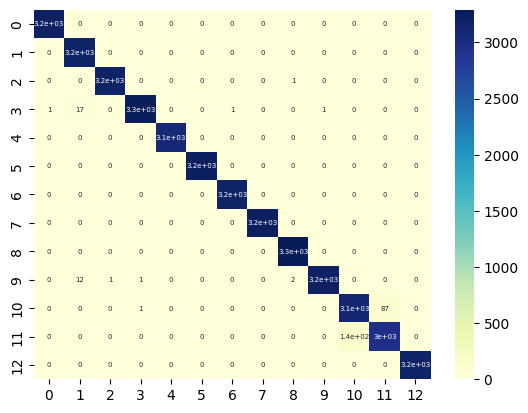

time: 641 ms (started: 2023-04-21 20:36:58 +00:00)


In [36]:
import seaborn as sb

dataplot = sb.heatmap(cm, cmap="YlGnBu", annot=True, annot_kws={"size": 5})

plt.show()

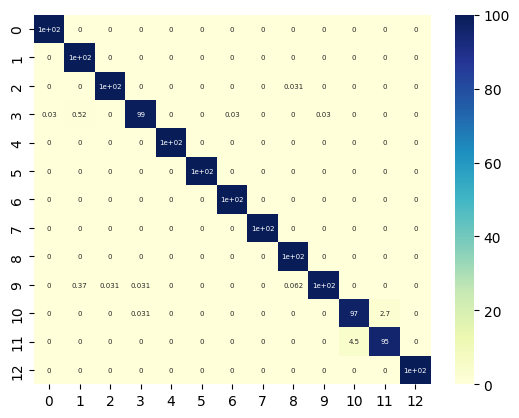

time: 632 ms (started: 2023-04-21 20:36:59 +00:00)


In [37]:
for i in range(13):
  a=cm.iloc[i].sum()
  cm.iloc[i]= (cm.iloc[i]/a)*100

import seaborn as sb

dataplot = sb.heatmap(cm, cmap="YlGnBu", annot=True, annot_kws={"size": 5})

plt.show()

In [38]:
from sklearn.metrics import precision_recall_fscore_support
print(precision_recall_fscore_support(y_test, y_1, average='macro'),"\n")

print(precision_recall_fscore_support(y_test, y_1, average='micro'),"\n")

print(precision_recall_fscore_support(y_test, y_1, average='weighted'), "\n")

(0.9935897765279107, 0.993543820680075, 0.9935539068496239, None) 

(0.9936298076923077, 0.9936298076923077, 0.9936298076923077, None) 

(0.9936533184122007, 0.9936298076923077, 0.9936288190568955, None) 

time: 1.05 s (started: 2023-04-21 20:37:00 +00:00)


time: 1.06 s (started: 2023-04-21 20:37:00 +00:00)
